In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
crop=pd.read_csv("Crop_recommendation.csv")
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [12]:
crop.shape

(2200, 8)

In [15]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [18]:
crop.info

<bound method DataFrame.info of         N   P   K  temperature   humidity        ph    rainfall   label
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

[2200 rows x 8 columns]>

In [21]:
crop.isnull()

,N,P,K,temperature,humidity,ph,rainfall,label
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2195,False,False,False,False,False,False,False,False
2196,False,False,False,False,False,False,False,False
2197,False,False,False,False,False,False,False,False
2198,False,False,False,False,False,False,False,False


In [24]:
crop.isnull().sum() #to check the data is clean or not

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [27]:
crop.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2195    False
2196    False
2197    False
2198    False
2199    False
Length: 2200, dtype: bool

In [30]:
crop.duplicated().sum()

0

In [33]:
crop.describe() #only numerical not categorial

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [36]:
#exploring data
numeric_columns = crop.select_dtypes(include=['number'])
correlation = numeric_columns.corr()
correlation

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


In [39]:
crop['N'].value_counts()

N
40     44
22     44
27     42
39     41
31     41
       ..
132     2
46      1
135     1
130     1
139     1
Name: count, Length: 137, dtype: int64

<Axes: >

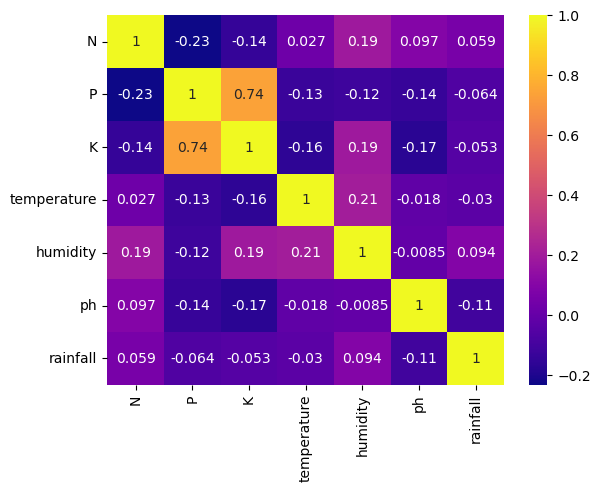

In [42]:
import seaborn as sns
sns.heatmap(correlation,annot=True,cbar=True,cmap='plasma')

<Axes: xlabel='N', ylabel='Count'>

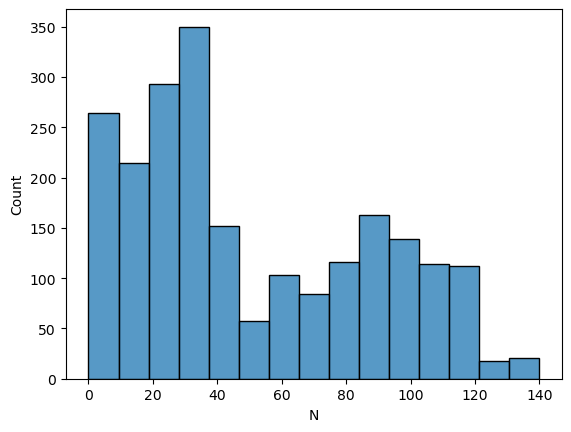

In [45]:
sns.histplot(crop['N'])

In [48]:
import copy

unique_crops = crop['label'].unique()
crop_dict = {crop: index + 1 for index, crop in enumerate(unique_crops)}

crop_dict_dupli = copy.deepcopy(crop_dict)

In [51]:
crop_dict

{'rice': 1,
 'maize': 2,
 'chickpea': 3,
 'kidneybeans': 4,
 'pigeonpeas': 5,
 'mothbeans': 6,
 'mungbean': 7,
 'blackgram': 8,
 'lentil': 9,
 'pomegranate': 10,
 'banana': 11,
 'mango': 12,
 'grapes': 13,
 'watermelon': 14,
 'muskmelon': 15,
 'apple': 16,
 'orange': 17,
 'papaya': 18,
 'coconut': 19,
 'cotton': 20,
 'jute': 21,
 'coffee': 22}

In [54]:
crop['crop_num']=crop['label'].map(crop_dict)
crop['crop_num'].value_counts()

crop_num
1     100
2     100
3     100
4     100
5     100
6     100
7     100
8     100
9     100
10    100
11    100
12    100
13    100
14    100
15    100
16    100
17    100
18    100
19    100
20    100
21    100
22    100
Name: count, dtype: int64

In [57]:
#new crop details
crop.drop(['label'],axis=1,inplace=True)
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,crop_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1


In [60]:
#training set
x=crop.drop('crop_num',axis=1)
y=crop['crop_num']

In [63]:
x.shape,y.shape

((2200, 7), (2200,))

In [66]:
from sklearn.model_selection import train_test_split

x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [69]:
x_train.shape,x_test.shape

((1760, 7), (440, 7))

In [72]:
x_train.info

<bound method DataFrame.info of         N    P    K  temperature   humidity        ph    rainfall
1656   17   16   14    16.396243  92.181519  6.625539  102.944161
752    37   79   19    27.543848  69.347863  7.143943   69.408782
892     7   73   25    27.521856  63.132153  7.288057   45.208411
1041  101   70   48    25.360592  75.031933  6.012697  116.553145
1179    0   17   30    35.474783  47.972305  6.279134   97.790725
...   ...  ...  ...          ...        ...       ...         ...
1638   10    5    5    21.213070  91.353492  7.817846  112.983436
1095  108   94   47    27.359116  84.546250  6.387431   90.812505
1130   11   36   31    27.920633  51.779659  6.475449  100.258567
1294   11  124  204    13.429886  80.066340  6.361141   71.400430
860    32   78   22    23.970814  62.355576  7.007038   53.409060

[1760 rows x 7 columns]>

In [75]:
#scaling feature using MinMaxScalar

from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()
ms.fit(x_train)

x_train=ms.transform(x_train)
x_test=ms.transform(x_test)

In [78]:
x_train

array([[0.12142857, 0.07857143, 0.045     , ..., 0.9089898 , 0.48532225,
        0.29685161],
       [0.26428571, 0.52857143, 0.07      , ..., 0.64257946, 0.56594073,
        0.17630752],
       [0.05      , 0.48571429, 0.1       , ..., 0.57005802, 0.58835229,
        0.08931844],
       ...,
       [0.07857143, 0.22142857, 0.13      , ..., 0.43760347, 0.46198144,
        0.28719815],
       [0.07857143, 0.85      , 0.995     , ..., 0.76763665, 0.44420505,
        0.18346657],
       [0.22857143, 0.52142857, 0.085     , ..., 0.56099735, 0.54465022,
        0.11879596]])

In [81]:
# Standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(x_train)

x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

In [84]:
x_train

array([[-9.03426596e-01, -1.12616170e+00, -6.68506601e-01, ...,
         9.36586183e-01,  1.93473784e-01,  5.14970176e-03],
       [-3.67051340e-01,  7.70358846e-01, -5.70589522e-01, ...,
        -1.00470485e-01,  8.63917548e-01, -6.05290566e-01],
       [-1.17161422e+00,  5.89737842e-01, -4.53089028e-01, ...,
        -3.82774991e-01,  1.05029771e+00, -1.04580687e+00],
       ...,
       [-1.06433917e+00, -5.24091685e-01, -3.35588533e-01, ...,
        -8.98381379e-01, -6.34357580e-04, -4.37358211e-02],
       [-1.06433917e+00,  2.12501638e+00,  3.05234239e+00, ...,
         3.86340190e-01, -1.48467347e-01, -5.69036842e-01],
       [-5.01145154e-01,  7.40255346e-01, -5.11839275e-01, ...,
        -4.18045489e-01,  6.86860180e-01, -8.96531475e-01]])

In [87]:
#Training Data Set

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score

models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
}

In [90]:
accuracy_scores = []

for i, md in models.items():
    md.fit(x_train, y_train)
    y_pred = md.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(f"{i} with accuracy: {accuracy}")

Logistic Regression with accuracy: 0.9636363636363636
Naive Bayes with accuracy: 0.9954545454545455
Support Vector Machine with accuracy: 0.9681818181818181
K-Nearest Neighbors with accuracy: 0.9659090909090909
Decision Tree with accuracy: 0.9818181818181818
Random Forest with accuracy: 0.9931818181818182
Bagging with accuracy: 0.9886363636363636


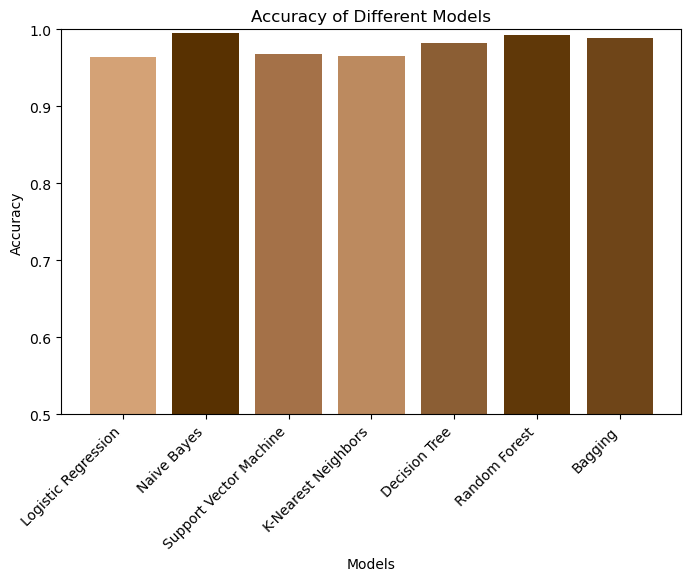

In [93]:
# visualizing

plt.figure(figsize=(8,5))
plt.bar(models.keys(),accuracy_scores,color=['#d4a276', '#583101', '#a47148', '#bc8a5f', '#8b5e34', '#603808', '#6f4518'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.ylim(0.5, 1)
plt.xticks(rotation=45, ha='right')

plt.show()

In [96]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

Random Forest Accuracy: 0.9931818181818182


In [99]:
import numpy as np

def recommendation(N, P, k, temperature, humidity, ph, rainfall):
    features = np.array([[N, P, k, temperature, humidity, ph, rainfall]])
    transformed_features = ms.fit_transform(features)
    transformed_features = sc.fit_transform(transformed_features)
    prediction = rf.predict(transformed_features).reshape(1, -1)

    return prediction[0]

In [102]:
N=90
P=42
K=43
T=20.87
H= 82
ph=6.5
rain=202

predict=recommendation(N,P,K,T,H,ph,rain)

crop_ref = {
    1: 'rice',
    2: 'maize',
    3: 'chickpea',
    4: 'kidneybeans',
    5: 'pigeonpeas',
    6: 'mothbeans',
    7: 'mungbean',
    8: 'blackgram',
    9: 'lentil',
    10: 'pomegranate',
    11: 'banana',
    12: 'mango',
    13: 'grapes',
    14: 'watermelon',
    15: 'muskmelon',
    16: 'apple',
    17: 'orange',
    18: 'papaya',
    19: 'coconut',
    20: 'cotton',
    21: 'jute',
    22: 'coffee'
}

predict[0] = max(1, min(predict[0], 22))

if predict[0] in crop_ref:
    crop = crop_ref[predict[0]]
    print("{} is the best crop to be cultivated.".format(crop))
else:
    print("Sorry, we are not able to recommend a proper crop for this environment.")


papaya is the best crop to be cultivated.


In [105]:
import pickle
pickle.dump(rf,open('model.pkl','wb'))

In [108]:
pickle.dump(ms,open('minmaxscaler.pkl','wb'))
pickle.dump(sc,open('standscaler.pkl','wb'))

In [111]:
import sklearn
print(sklearn.__version__)


1.3.2
